# Stock Prediction -
Take stock price of any company you want and predicts
its price by using LSTM.

# Import Librairies

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Load and Analysis Data

In [6]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Desktop/CodeAlpha/netflix.csv")
closed_prices = df['Close']

In [7]:
seq_len = 15

In [8]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()
#The code scales the closed_prices data so that all values are within a normalized range (usually between 0 and 1). 
#After scaling, if necessary, the array is "squeezed" back to a 1D array".

In [9]:
X=[]
Y=[]

In [10]:
for i in range(len(scaled_price)- seq_len):
    X.append(scaled_price[i :i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [11]:
X = np.array(X)[... , None]
Y = np.array(Y)[... ,None]

In [12]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*X.shape[0])]).float()
# This code snippet is converting NumPy arrays X and Y into PyTorch tensors, splitting them into training and testing datasets. 
#The code is attempting to split the data into training and testing sets and convert them into PyTorch tensors for use in a PyTorch-based machine learning model. 
#However, it contains a mistake where the test set is incorrectly defined to be the same as the training set.

# Make Model

In [14]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Model, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self. fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        return self.fc(hidden[-1, :])

In [15]:
model = Model(1,96)

In [16]:
optimizer=torch.optim.Adam(model.parameters(), lr = 0.001)

In [17]:
loss_fn = nn.MSELoss()

In [18]:
num_epochs=100

In [19]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output, train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 and epoch != 0:
        print(epoch, "epoch loss", loss.detach().numpy())

#This code snippet is part of the training loop for a machine learning model using PyTorch.
#The code is implementing a training loop where the model is trained for a specified number of epochs (num_epochs). 
#In each epoch, the model's predictions are compared to the true target values, the loss is calculated, and the model's parameters are updated using the gradients to minimize the loss. 
#Every 10 epochs, the current epoch number and the corresponding loss value are printed to monitor the training progress.

10 epoch loss 0.029637232
20 epoch loss 0.026065102
30 epoch loss 0.021823628
40 epoch loss 0.013482078
50 epoch loss 0.0028030244
60 epoch loss 0.002833506
70 epoch loss 0.002736437
80 epoch loss 0.0022015807
90 epoch loss 0.002072008


In [20]:
model.eval()
with torch.no_grad():
    output=model(test_x)

# Print the real Value and Predict Value

In [22]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())
print("Predicted values:", pred)
print("Real values:", real)

Predicted values: [[300.028  ]
 [301.686  ]
 [303.0979 ]
 [304.2092 ]
 [306.1383 ]
 [309.14557]
 [312.83527]
 [315.89127]
 [318.11664]
 [321.15002]
 [323.00198]
 [323.9912 ]
 [325.17133]
 [326.15295]
 [326.67816]
 [326.5551 ]
 [326.72562]
 [326.77298]
 [325.90897]
 [324.39264]
 [324.58044]
 [323.11996]
 [320.3803 ]
 [318.61893]
 [315.67462]
 [313.35767]
 [311.8778 ]
 [311.13068]
 [310.20053]
 [309.5382 ]
 [309.76056]
 [310.56793]
 [311.92575]
 [313.5254 ]
 [314.68372]
 [318.06476]
 [321.3775 ]
 [324.3191 ]
 [326.3445 ]
 [327.24918]
 [326.70337]
 [325.76398]
 [325.49258]
 [325.14896]
 [324.90936]
 [324.73193]
 [324.56543]
 [324.242  ]
 [324.691  ]
 [325.7896 ]
 [326.73788]
 [327.97467]
 [329.08408]
 [329.81396]
 [330.64853]
 [331.2256 ]
 [331.86496]
 [332.07593]
 [332.1259 ]
 [332.81833]
 [333.48737]
 [335.31778]
 [337.56247]
 [339.7982 ]
 [341.63983]
 [343.58972]
 [345.11282]
 [347.19687]
 [349.3204 ]
 [351.59802]
 [353.84244]
 [355.2502 ]
 [356.31906]
 [357.25027]
 [358.16837]
 [360.5

# Make a graph of predicted & real values red color is predicted value and green color is real value 

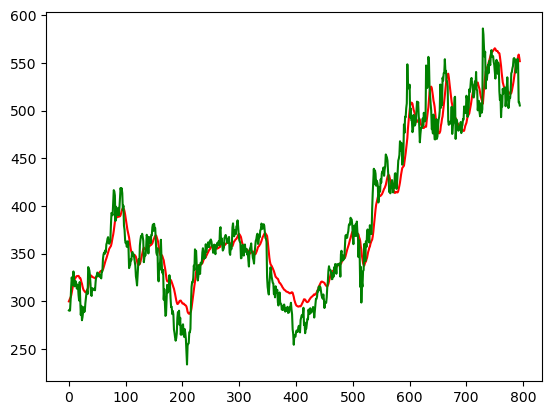

In [24]:
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()